In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import itertools

In [2]:
df_train = pd.read_csv('Datasets/train.csv') # using pandas to read the test set
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
useless_cols = ['id','CustomerId','Surname']
df_train.drop(columns=useless_cols,inplace=True)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
string_cols = ['Geography','Gender']
target = ['Exited']

df_train = pd.get_dummies(df_train,columns=string_cols,dtype=int)
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


In [5]:
df_train['Balance'] = df_train.Balance.apply(lambda x: 0 if x == 0 else 1)
df_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,1,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0,2,1.0,1.0,15068.83,0,0,0,1,0,1


In [6]:
df_train1 = df_train[df_train.HasCrCard == 1]
df_train2 = df_train[df_train.HasCrCard == 0]

In [7]:
print(df_train1.shape)

(124428, 14)


In [8]:
print(df_train2.shape)

(40606, 14)


In [11]:
X1 = df_train1.drop(columns=['Exited','HasCrCard'])
y1 = df_train1.Exited

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,stratify=y1)

In [12]:
X2 = df_train2.drop(columns=['Exited','HasCrCard'])
y2 = df_train2.Exited

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,stratify=y2)

In [17]:
X2

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
16,602,36.0,7,0,2,1.0,135082.47,1,0,0,0,1
19,559,61.0,1,1,1,1.0,180890.40,1,0,0,0,1
20,773,35.0,9,0,2,1.0,87549.36,0,0,1,0,1
26,616,31.0,3,1,2,1.0,59346.40,0,0,1,0,1
32,797,55.0,0,1,2,1.0,62402.38,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165019,719,32.0,6,1,1,1.0,77500.48,1,0,0,1,0
165021,632,41.0,6,0,2,1.0,128528.83,0,0,1,1,0
165022,577,45.0,2,0,1,0.0,148811.14,1,0,0,1,0
165030,792,35.0,3,0,1,0.0,131834.45,1,0,0,0,1


In [13]:
models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train1, y_train1)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test1)
    accuracy = accuracy_score(y_test1, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.05, 'max_depth': 5, 'n_estimators': 70}, 'Test_Accuracy': 0.870087599453508}


,Model,Best_Params,Test_Accuracy
0,XGBoost,"{'booster': 'gbtree', 'eta': 0.05, 'max_depth'...",0.870088


In [14]:
models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train2, y_train2)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test2)
    accuracy = accuracy_score(y_test2, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5, 'n_estimators': 50}, 'Test_Accuracy': 0.8468357547402118}


,Model,Best_Params,Test_Accuracy
0,XGBoost,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth':...",0.846836


In [65]:
y_test2 = pd.DataFrame(y_test2)

y_test2['pred_result'] = y_pred

y_test2['Ok'] = (y_test2['Exited'] == y_test2['pred_result'])
y_test2

,Exited,pred_result,Ok
22639,0,0,True
115409,1,1,True
4650,1,0,False
88551,0,0,True
117530,0,0,True
...,...,...,...
158218,0,0,True
102916,0,1,False
100603,0,0,True
92555,0,0,True


In [72]:
y_test2_final = pd.merge(y_test2,X_test2,left_index=True,right_index=True).sort_index()

In [74]:
y_test2_final

,Exited,pred_result,Ok,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
46,0,0,True,488,34.0,5,1,2,1.0,172638.13,0,1,0,0,1
69,1,1,True,678,43.0,8,1,1,0.0,120853.51,0,1,0,1,0
110,1,1,True,681,58.0,9,1,2,0.0,118749.58,0,1,0,0,1
128,1,1,True,633,52.0,3,1,1,0.0,82298.81,0,1,0,1,0
145,1,1,True,835,37.0,4,0,1,0.0,158043.11,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164982,1,1,True,535,42.0,6,0,1,1.0,185660.30,1,0,0,1,0
164987,0,0,True,614,29.0,7,1,1,1.0,122433.09,1,0,0,0,1
164993,0,0,True,729,35.0,2,1,2,0.0,171708.66,0,1,0,1,0
165001,0,0,True,748,43.0,9,0,1,1.0,117031.20,1,0,0,0,1


<Axes: xlabel='Ok', ylabel='count'>

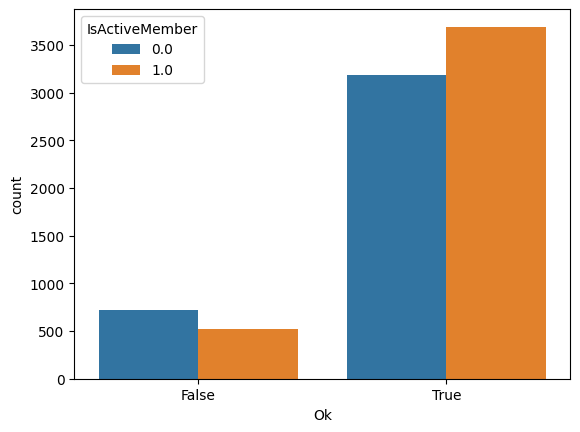

In [85]:
sns.countplot(y_test2_final,x='Ok',hue='IsActiveMember')

In [86]:
X2

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
16,602,36.0,7,0,2,1.0,135082.47,1,0,0,0,1
19,559,61.0,1,1,1,1.0,180890.40,1,0,0,0,1
20,773,35.0,9,0,2,1.0,87549.36,0,0,1,0,1
26,616,31.0,3,1,2,1.0,59346.40,0,0,1,0,1
32,797,55.0,0,1,2,1.0,62402.38,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165019,719,32.0,6,1,1,1.0,77500.48,1,0,0,1,0
165021,632,41.0,6,0,2,1.0,128528.83,0,0,1,1,0
165022,577,45.0,2,0,1,0.0,148811.14,1,0,0,1,0
165030,792,35.0,3,0,1,0.0,131834.45,1,0,0,0,1


In [87]:
df_train3 = df_train2[df_train2['IsActiveMember'] == 1]
df_train2 = df_train2[df_train2['IsActiveMember'] == 0]

In [88]:
X2 = df_train2.drop(columns=['Exited','HasCrCard','IsActiveMember'])
y2 = df_train2.Exited

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,stratify=y2)

In [89]:
X3 = df_train3.drop(columns=['Exited','HasCrCard','IsActiveMember'])
y3 = df_train3.Exited

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2,stratify=y3)

In [92]:
models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train2, y_train2)

    best_params = grid_search.best_params_
    y_pred2 = grid_search.predict(X_test2)
    accuracy = accuracy_score(y_test2, y_pred2)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.05, 'max_depth': 5, 'n_estimators': 50}, 'Test_Accuracy': 0.805852417302799}


,Model,Best_Params,Test_Accuracy
0,XGBoost,"{'booster': 'gbtree', 'eta': 0.05, 'max_depth'...",0.805852


In [91]:
models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train3, y_train3)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test3)
    accuracy = accuracy_score(y_test3, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5, 'n_estimators': 30}, 'Test_Accuracy': 0.8771469465648855}


,Model,Best_Params,Test_Accuracy
0,XGBoost,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth':...",0.877147


In [96]:
grid_search.best_estimator_.feature_importances_

array([0.01581876, 0.32862413, 0.01531592, 0.08909079, 0.39056945,
       0.0220091 , 0.01381678, 0.07562838, 0.        , 0.04912677,
       0.        ], dtype=float32)

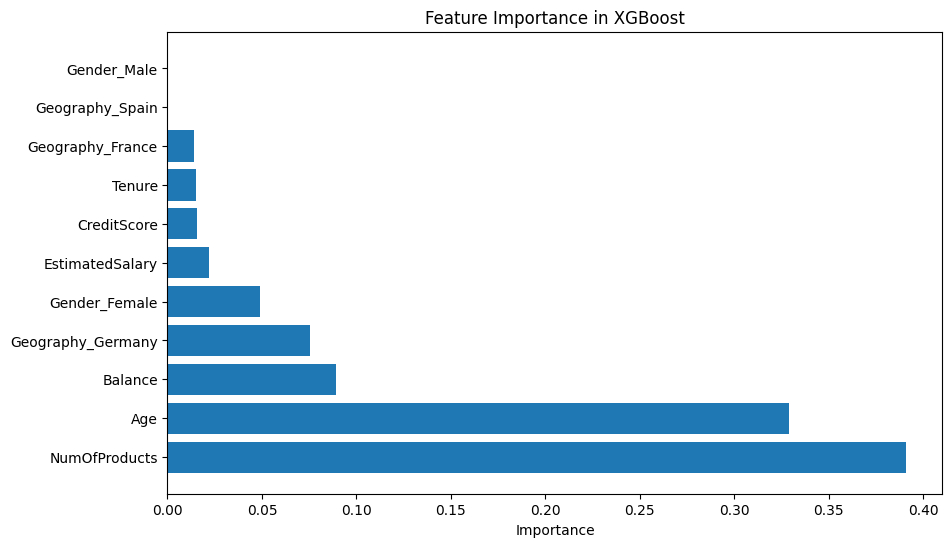

In [99]:
# Obtener la importancia de las características
feature_importance = grid_search.best_estimator_.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost')
plt.show()

In [93]:
y_test2 = pd.DataFrame(y_test2)

y_test2['pred_result'] = y_pred2

y_test2['Ok'] = (y_test2['Exited'] == y_test2['pred_result'])
y_test2_final = pd.merge(y_test2,X_test2,left_index=True,right_index=True).sort_index()

<Axes: xlabel='Ok', ylabel='count'>

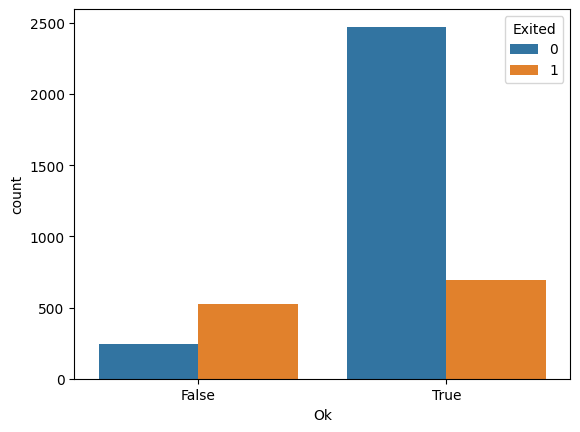

In [95]:
sns.countplot(y_test2_final,x='Ok',hue='Exited')

In [100]:
y_test2_final

,Exited,pred_result,Ok,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
69,1,1,True,678,43.0,8,1,1,120853.51,0,1,0,1,0
108,1,1,True,569,43.0,3,0,1,119996.68,1,0,0,0,1
110,1,1,True,681,58.0,9,1,2,118749.58,0,1,0,0,1
128,1,1,True,633,52.0,3,1,1,82298.81,0,1,0,1,0
129,0,0,True,682,34.0,5,1,1,96542.00,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164857,0,0,True,678,51.0,1,0,2,18094.96,1,0,0,1,0
164880,0,0,True,611,41.0,3,0,2,165020.63,1,0,0,0,1
164882,1,0,False,728,33.0,8,1,1,174775.20,0,0,1,0,1
164913,0,0,True,642,30.0,5,1,1,582.53,0,1,0,1,0


In [113]:
X = df_train.drop(columns=['Exited'])
y = df_train.Exited

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [114]:
models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5, 'n_estimators': 70}, 'Test_Accuracy': 0.8653012997243009}


,Model,Best_Params,Test_Accuracy
0,XGBoost,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth':...",0.865301


In [115]:
y_test_df = pd.DataFrame(y_test)

y_test_df['pred_result'] = y_pred

y_test_df['Ok'] = (y_test_df['Exited'] == y_test_df['pred_result'])
y_test_df = pd.merge(y_test_df,X_test,left_index=True,right_index=True).sort_index()

In [116]:
y_test_df

,Exited,pred_result,Ok,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2,0,0,True,678,40.0,10,0,2,1.0,0.0,184866.69,1,0,0,0,1
20,0,0,True,773,35.0,9,0,2,0.0,1.0,87549.36,0,0,1,0,1
25,1,0,False,703,39.0,9,0,1,1.0,0.0,131363.57,0,0,1,0,1
28,1,0,False,785,41.0,4,0,1,1.0,0.0,170968.99,0,0,1,0,1
37,0,0,True,752,37.0,6,0,2,0.0,0.0,1187.88,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165008,0,0,True,679,47.0,5,1,1,1.0,1.0,144880.81,0,0,1,1,0
165013,0,0,True,659,39.0,2,0,2,1.0,1.0,100929.59,1,0,0,1,0
165017,0,0,True,598,40.0,2,0,2,1.0,0.0,187840.51,1,0,0,0,1
165024,1,0,False,592,33.0,3,1,2,1.0,1.0,176747.66,0,1,0,1,0


In [118]:
y_pred_cond = y_test_df[(y_test_df.IsActiveMember == 0) & (y_test_df.HasCrCard == 0)].pred_result
y_test_cond = y_test_df[(y_test_df.IsActiveMember == 0) & (y_test_df.HasCrCard == 0)].Exited

print(accuracy_score(y_test_cond,y_pred_cond))

0.8124054462934948


In [123]:
y_pred_cond.shape

(3966,)

In [124]:
y_test_df

,Exited,pred_result,Ok,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2,0,0,True,678,40.0,10,0,2,1.0,0.0,184866.69,1,0,0,0,1
20,0,0,True,773,35.0,9,0,2,0.0,1.0,87549.36,0,0,1,0,1
25,1,0,False,703,39.0,9,0,1,1.0,0.0,131363.57,0,0,1,0,1
28,1,0,False,785,41.0,4,0,1,1.0,0.0,170968.99,0,0,1,0,1
37,0,0,True,752,37.0,6,0,2,0.0,0.0,1187.88,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165008,0,0,True,679,47.0,5,1,1,1.0,1.0,144880.81,0,0,1,1,0
165013,0,0,True,659,39.0,2,0,2,1.0,1.0,100929.59,1,0,0,1,0
165017,0,0,True,598,40.0,2,0,2,1.0,0.0,187840.51,1,0,0,0,1
165024,1,0,False,592,33.0,3,1,2,1.0,1.0,176747.66,0,1,0,1,0


In [125]:
X = df_train[(df_train.IsActiveMember == 0) & (df_train.HasCrCard == 0)].drop(columns=['Exited'])
y = df_train[(df_train.IsActiveMember == 0) & (df_train.HasCrCard == 0)].Exited

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [126]:
X.shape

(19646, 13)

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'XGBoost': XGBClassifier(),
    'Other': SVC()
}

param_grids = {
    'XGBoost': {'n_estimators': [10, 30, 50, 70, 100],'booster':['gbtree'],'eta':[0.3,0.1]},
    'Other': {'C': [0.1,1,10],'kernel':['linear','sigmoid','poly','rbf'],'gamma': [0.1, 1, 'scale', 'auto']}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
print(results_df)

Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.1, 'n_estimators': 50}, 'Test_Accuracy': 0.8106870229007633}


In [6]:
X = df_train.drop(columns=['Exited'])
y = df_train.Exited

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [7]:
from sklearn.metrics import roc_auc_score

models = {
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 30,50,70], 'max_depth': [5, 7,10],'booster':['gbtree'],'eta':[0.1,0.05]},
    'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    
    y_probs = grid_search.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    roc_auc = roc_auc_score(y_test, y_probs)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': roc_auc
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Number of positive: 22349, number of negative: 83272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 105621, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211596 -> initscore=-1.315331
[LightGBM] [Info] Start training from score -1.315331
[LightGBM] [Info] Number of positive: 22349, number of negative: 83272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 105621, number of used features: 13
[LightGBM] [Info] 

,Model,Best_Params,Test_Accuracy
0,LightGBM,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.887589
1,XGBoost,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth':...",0.887555
2,RandomForest,"{'max_depth': 10, 'n_estimators': 50}",0.885000
3,GradientBoosting,"{'max_depth': 7, 'n_estimators': 50}",0.887157
